In [1]:
#Importação das Bibliotecas
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt,modf
import math

In [2]:
#Importando Dataframe

dataframe = pd.read_csv("bancoDeDados.csv", sep = ",")
dataframe.head()

FileNotFoundError: ignored

In [ ]:
dataframe = dataframe.dropna()
dataframe.head()

,new_deaths_smoothed_per_million,people_vaccinated
0,4488.0,112
1,4478.0,1109
2,4502.0,13527
3,4589.0,105824
4,4718.0,193699


In [ ]:
#Normalizando os dados
dataframe_normalizado = dataframe.copy() 
for column in dataframe_normalizado.columns: 
    dataframe_normalizado[column] = (dataframe_normalizado[column] - dataframe_normalizado[column].min()) / (dataframe_normalizado[column].max() - dataframe_normalizado[column].min())

print(dataframe_normalizado)

     new_deaths_smoothed_per_million  people_vaccinated
0                           0.309064           0.000000
1                           0.308375           0.000005
2                           0.310028           0.000072
3                           0.316019           0.000564
4                           0.324903           0.001033
..                               ...                ...
576                         0.000008           1.000000
577                         0.000009           1.000000
578                         0.000009           1.000000
579                         0.000009           1.000000
580                         0.000011           1.000000

[581 rows x 2 columns]


In [ ]:
count_row = dataframe_normalizado.shape[0] #Pegando os números de registros
count_col = dataframe_normalizado.shape[1] #Pegando os números de colunas
colunas = ['people_vaccinated','new_deaths_smoothed_per_million']

print(count_row)
print(count_col)

581
2


In [ ]:
#Selecionando variaveis
#Independente

pessoas_vacinadas = dataframe_normalizado[['people_vaccinated']]

porcentagem_obito = dataframe_normalizado[['new_deaths_smoothed_per_million']]

print(pessoas_vacinadas)

print(porcentagem_obito)


     people_vaccinated
0             0.000000
1             0.000005
2             0.000072
3             0.000564
4             0.001033
..                 ...
576           1.000000
577           1.000000
578           1.000000
579           1.000000
580           1.000000

[581 rows x 1 columns]
     new_deaths_smoothed_per_million
0                           0.309064
1                           0.308375
2                           0.310028
3                           0.316019
4                           0.324903
..                               ...
576                         0.000008
577                         0.000009
578                         0.000009
579                         0.000009
580                         0.000011

[581 rows x 1 columns]


In [ ]:
pessoas_vacinadas_treino,pessoas_vacinadas_teste,porcentagem_obito_treino,porcentagem_obito_teste = train_test_split(pessoas_vacinadas,porcentagem_obito,test_size=0.2,random_state = 42)

pessoas_vacinadas_treino_seq = np.linspace(pessoas_vacinadas_treino.min(),pessoas_vacinadas_treino.max(),581).reshape(-1,1)


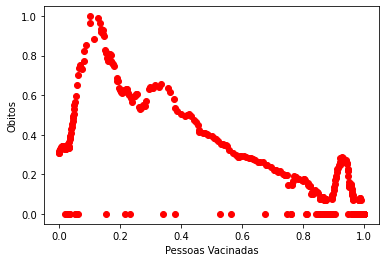

In [ ]:
#Exibir a correlação Linear entre as features do dataset de treinamento
plt.scatter(pessoas_vacinadas_treino,porcentagem_obito_treino,color = 'red')
plt.xlabel('Pessoas Vacinadas')
plt.ylabel('Obitos')
plt.show()

In [ ]:
#Treinando o modelo com regressão linear

modelo = make_pipeline(PolynomialFeatures(7,include_bias = False),LinearRegression())

modelo.fit(pessoas_vacinadas_treino,porcentagem_obito_treino)



Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=False)),
                ('linearregression', LinearRegression())])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


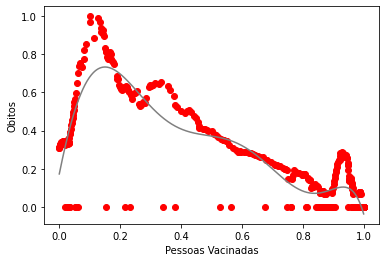

In [ ]:
#Exibir a correlação Linear entre as features do dataset de treinamento
plt.scatter(pessoas_vacinadas_treino,porcentagem_obito_treino,color = 'red')
plt.plot(pessoas_vacinadas_treino_seq,modelo.predict(pessoas_vacinadas_treino_seq),color="gray")
plt.xlabel('Pessoas Vacinadas')
plt.ylabel('Obitos')
plt.show()

In [ ]:
#Executar no Dataset de teste

preverMortes = modelo.predict(pessoas_vacinadas_teste)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


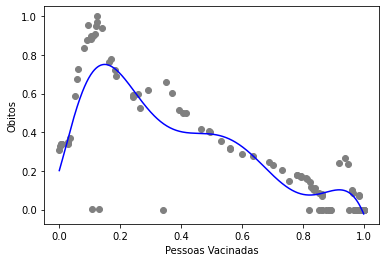

In [ ]:
#Exibir a correlação Linear entre as features do dataset de treinamento
plt.scatter(pessoas_vacinadas_teste,porcentagem_obito_teste,color = 'gray')
plt.plot(pessoas_vacinadas_treino_seq,modelo.predict(pessoas_vacinadas_treino_seq),color="blue")
plt.xlabel('Pessoas Vacinadas')
plt.ylabel('Obitos')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


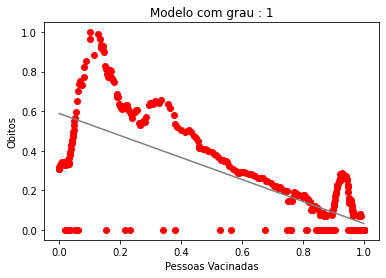

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


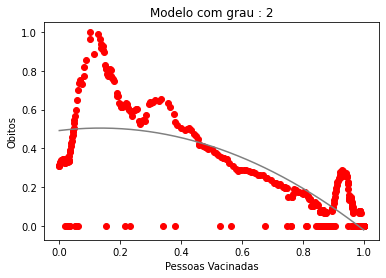

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


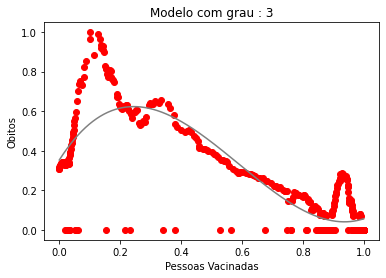

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


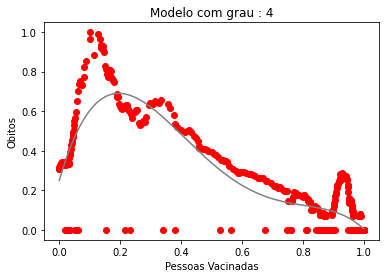

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


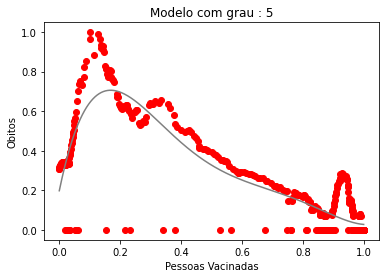

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


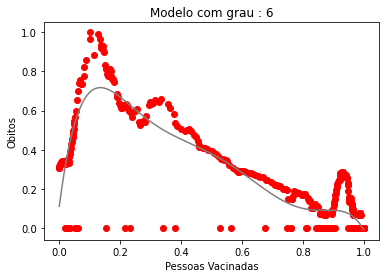

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


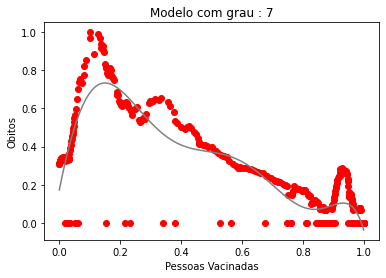

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


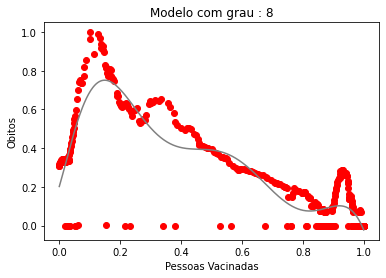

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


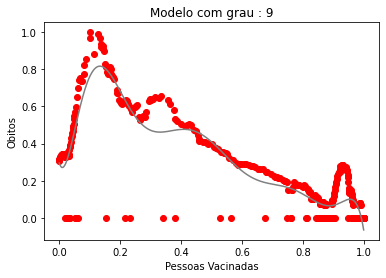

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


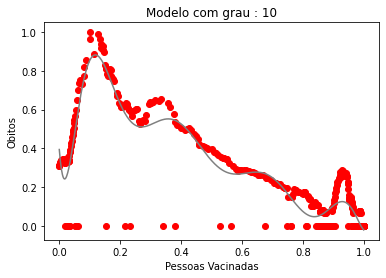

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


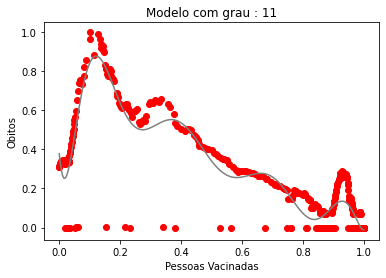

In [ ]:
#Printando diversos modelos diferentes

for coefficient in range(1,12):
  modelo = make_pipeline(PolynomialFeatures(coefficient,include_bias=False),LinearRegression())
  modelo.fit(pessoas_vacinadas_treino,porcentagem_obito_treino)
  plt.figure()
  plt.title("Modelo com grau : %d" % coefficient)
  plt.scatter(pessoas_vacinadas_treino,porcentagem_obito_treino,color = 'red')
  plt.plot(pessoas_vacinadas_treino_seq,modelo.predict(pessoas_vacinadas_treino_seq),color="gray")
  plt.xlabel('Pessoas Vacinadas')
  plt.ylabel('Obitos')
  plt.show()

In [ ]:
#Avaliar o modelo
print('Soma dos Erros ao Quadrado (SSE): %.2f' % np.sum((preverMortes - porcentagem_obito_teste))**2)
print('Erro Quadratico Médio (MSE): %.2f' % mean_squared_error(porcentagem_obito_teste,preverMortes))
print('Erro Médio Absoluto (EMA): %.2f' % mean_absolute_error(porcentagem_obito_teste,preverMortes))
print('Raiz do Erro Quadratico Médio (RMSE): %.2f' % sqrt(mean_squared_error(porcentagem_obito_teste,preverMortes)))
print('R2 - Score: %.2f' % r2_score(preverMortes,porcentagem_obito_teste ) )

Soma dos Erros ao Quadrado (SSE): 6.03
Erro Quadratico Médio (MSE): 0.02
Erro Médio Absoluto (EMA): 0.09
Raiz do Erro Quadratico Médio (RMSE): 0.14
R2 - Score: 0.70


In [ ]:
total_de_pessoas_vacinadas = float(input("Digite a porcentagem da população vacinada\n"))

total_de_pessoas_vacinadas = modelo.predict([[total_de_pessoas_vacinadas]])

print("O total de obitos é %f" % total_de_pessoas_vacinadas[0][0])

Digite a porcentagem da população vacinada
0.5
O total de obitos é 0.371305


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
